<a href="https://colab.research.google.com/github/Afrah333333/deep-learning/blob/main/Neural_Network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neual Networks

In [46]:
!pip3 install torch torchvision

In [47]:
import torch
import torch.nn as nn

In the data below, X represents temperature variations and the count of sunlit days in different cities, whereas y ice cream sales in each city. The variable xPredicted is a single input for which we want to predict the ice cream sale using the parameters learned by the neural network. Remember, the neural network wants to learn a mapping between X and y, so it will try to guess from what it has learned from the training data.

In [48]:
import torch
X = torch.tensor(([
    [30, 8],  # Temperature and sunny days for City A
    [25, 5],  # Temperature and sunny days for City B
    [28, 6],  # Temperature and sunny days for City C
    [32, 10]  # Temperature and sunny days for City D
]),dtype=torch.float)

y = torch.tensor(([200], [150], [180], [220]),dtype=torch.float)#ice cream sales for each city

xPredicted = torch.tensor(([27, 7]), dtype=torch.float)

In [49]:
print(X.shape)
print(y.shape)

torch.Size([4, 2])
torch.Size([4, 1])


In [42]:
# scale units
X_max, _ = torch.max(X, 0)
xPredicted_max, _ = torch.max(xPredicted, 0)

X = torch.div(X, X_max)
xPredicted = torch.div(xPredicted, xPredicted_max)
y = y / 100  # max test score is 100

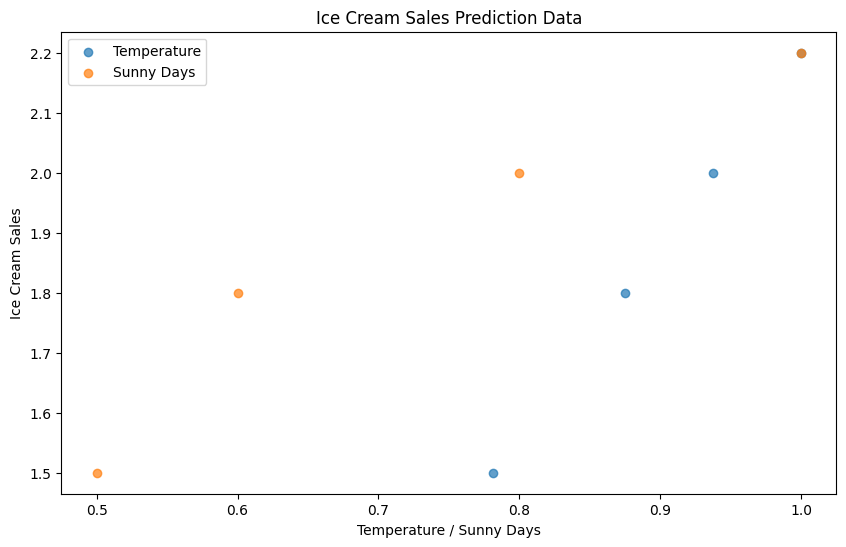

In [43]:
#visualize,visualize,visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], y, label='Temperature', alpha=0.7)
plt.scatter(X[:, 1], y, label='Sunny Days', alpha=0.7)

plt.title('Ice Cream Sales Prediction Data')
plt.xlabel('Temperature / Sunny Days')
plt.ylabel('Ice Cream Sales')
plt.legend()
plt.show()

Model Building

In [44]:
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
import torch.optim as optim

class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # parameters
        # TODO: parameters can be parameterized instead of declaring them here
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 4

        # weights
        self.W1 = nn.Parameter(torch.randn(self.inputSize, self.hiddenSize))
        self.W2 = nn.Parameter(torch.randn(self.hiddenSize, self.outputSize))

    def forward(self, X):
        self.z = torch.matmul(X, self.W1)  # 3 X 3 ".dot" does not broadcast in PyTorch
        self.z2 = torch.relu(self.z)  # ReLU activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.z3
        return o

    def backward(self, X, y, o, optimizer):
        # calculate loss
        loss = torch.mean((y - o)**2)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        return loss

    def train(self, X, y, epochs=100, learning_rate=0.01):
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)

        for epoch in range(epochs):
            # forward pass
            o = self.forward(X)

            # backward pass
            loss = self.backward(X, y, o, optimizer)

            # Optionally, you can print the loss for each epoch if needed
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

    def predict(self, X):
        print("Predicted data based on trained weights: ")
        print("Input (scaled): \n" + str(X))
        print("Output: \n" + str(self.forward(X)))

# Assuming you have X and y defined
model = Neural_Network()
model.train(X, y, epochs=100, learning_rate=0.01)



Epoch 1/100, Loss: 4.693308353424072
Epoch 2/100, Loss: 4.45364236831665
Epoch 3/100, Loss: 4.234607219696045
Epoch 4/100, Loss: 4.032637596130371
Epoch 5/100, Loss: 3.8924179077148438
Epoch 6/100, Loss: 3.7606236934661865
Epoch 7/100, Loss: 3.6346423625946045
Epoch 8/100, Loss: 3.5132079124450684
Epoch 9/100, Loss: 3.395254611968994
Epoch 10/100, Loss: 3.2798829078674316
Epoch 11/100, Loss: 3.1663413047790527
Epoch 12/100, Loss: 3.054007053375244
Epoch 13/100, Loss: 2.942373275756836
Epoch 14/100, Loss: 2.831040859222412
Epoch 15/100, Loss: 2.7197093963623047
Epoch 16/100, Loss: 2.608173370361328
Epoch 17/100, Loss: 2.4963154792785645
Epoch 18/100, Loss: 2.3841047286987305
Epoch 19/100, Loss: 2.2715885639190674
Epoch 20/100, Loss: 2.1588926315307617
Epoch 21/100, Loss: 2.0462114810943604
Epoch 22/100, Loss: 1.933804988861084
Epoch 23/100, Loss: 1.8219892978668213
Epoch 24/100, Loss: 1.7111279964447021
Epoch 25/100, Loss: 1.60162353515625
Epoch 26/100, Loss: 1.4939048290252686
Epoch 27

In [45]:
xtest = torch.tensor(([27, 7]), dtype=torch.float)
model.predict(xtest)

Predicted data based on trained weights: 
Input (scaled): 
tensor([27.,  7.])
Output: 
tensor([51.7794], grad_fn=<SqueezeBackward4>)
